## Read data

In [1]:
import shapely
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly
import contextily as cx
import json
import shapely
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

In [2]:
# subscr_df = pd.read_excel("../data/reconnect_subscribers/ReConnect_Project_Construction_Status.xlsx", sheet_name="Geocoded Subscribers")
# subscr_df['Longitude'] = pd.to_numeric(subscr_df['Longitude'].str.strip(u"\ufeff"))
# subscr_df['Latitude'] = pd.to_numeric(subscr_df['Latitude'].str.strip(u"\ufeff"))

# subscr_gdf = gpd.GeoDataFrame(subscr_df, geometry = gpd.points_from_xy(subscr_df['Longitude'], subscr_df['Latitude']), crs = proj_gdf.crs)
# subscr_gdf

# read directly the address-matched dataset
subscr_df = pd.read_csv("../data/subscribers_geocoded_and_matched.csv", low_memory=False)
subscr_gdf = gpd.GeoDataFrame(subscr_df, geometry = gpd.points_from_xy(subscr_df['Longitude'], subscr_df['Latitude']))
subscr_gdf = subscr_gdf.set_crs("EPSG:4326")
subscr_gdf

,sub_pk,Project ID,Subscriber Type,Price,Period Start Date,Period End Date,Offering Type,Download Speed,Upload Speed,Address,...,owner2_firstname,owner2_middle_name,owner2_last_name,parsed_owner_source_code,full_address,Bing_lat_y,Bing_lng_y,best_lat,best_lng,geometry
0,818,IA1701-A61,Residence,49.95,1/1/2021,12/31/2021,Data,25,2.0,25572 Highway 12,...,LUCY,NaN,DENNISON,3.0,"25572 HIGHWAY 12, WESTFIELD, IA, 51062",NaN,NaN,42.685230,-96.567011,POINT (-96.57196 42.68890)
1,819,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,25754 Highway 12,...,JULIA N,NaN,CURRY,1.0,"25754 HIGHWAY 12, WESTFIELD, IA, 51062",NaN,NaN,42.683011,-96.562288,POINT (-96.57196 42.68890)
2,820,IA1701-A61,Residence,32.95,1/1/2021,12/31/2021,Data/Voice,25,3.0,21601 N Ridge Rd,...,CINDY,M,LLOYD,3.0,"21601 N RIDGE RD, WESTFIELD, IA, 51062",NaN,NaN,42.742318,-96.588417,POINT (-96.52416 42.71772)
3,821,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,23079 K18n,...,NaN,NaN,NaN,3.0,"23079 K18N, WESTFIELD, IA, 51062",NaN,NaN,42.719780,-96.476048,POINT (-96.52416 42.71772)
4,822,IA1701-A61,Residence,32.95,1/1/2021,12/31/2021,Data/Voice,25,2.0,23345 K18n,...,NaN,NaN,NaN,3.0,"23345 K18N, WESTFIELD, IA, 51062",NaN,NaN,42.716212,-96.476020,POINT (-96.52416 42.71772)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,3218,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,7590 151st Ave NE,...,SHELLE A,NaN,SCHMIDT,1.0,"7590 151ST AVE NE, GRAFTON, ND, 58237",NaN,NaN,48.512447,-97.384066,POINT (-97.38411 48.51253)
914,3219,ND1702-A59,Residence,57.95,1/1/2021,12/31/2021,Data,50,50.0,15229 76th St NE,...,DAVID,NaN,SZKLARSKI,1.0,"15229 76TH ST NE, GRAFTON, ND, 58237",NaN,NaN,48.513901,-97.358465,POINT (-97.36277 48.51397)
915,3220,ND1702-A59,Residence,45.65,1/1/2021,12/31/2021,Data/Voice/Video,50,50.0,15149 76th St NE,...,NaN,NaN,NaN,3.0,"15149 76TH ST NE, GRAFTON, ND, 58237",NaN,NaN,48.514480,-97.374058,POINT (-97.37406 48.51424)
916,3224,ND1702-A59,Residence,57.95,1/1/2021,12/31/2021,Data,50,50.0,15207 77th St NE,...,NaN,NaN,NaN,3.0,"15207 77TH ST NE, GRAFTON, ND, 58237",NaN,NaN,48.528471,-97.363828,POINT (-97.36353 48.52816)


In [3]:
proj_json_str = open("../data/reconnect_subscribers/reconnect_project_areas_20230309.json", "r").read()
proj_json = json.loads(proj_json_str)
proj_df = pd.DataFrame.from_dict(proj_json)
proj_df['geometry'] = proj_df.apply(lambda row: shapely.geometry.shape(row['geometry']), axis=1)

proj_df['area'] = proj_df.apply(lambda row: row['geometry'].area, axis=1)
proj_df.sort_values(by='area', ascending=False, inplace=True)

# nproj = 3   # sorted by area, how many projects do we want to consider
# proj_gdf = gpd.GeoDataFrame(proj_df.head(nproj), geometry=proj_df.geometry)

# list_of_proj = list(subscr_df["Project ID"].unique())
list_of_proj = ["IA1701-A61"]
proj_gdf = gpd.GeoDataFrame(proj_df[proj_df['Project ID'].isin(list_of_proj)], geometry=proj_df.geometry, crs = subscr_gdf.crs).reset_index(drop=True)
proj_gdf

,Project ID,geometry,area
0,IA1701-A61,"MULTIPOLYGON (((-96.38180 42.90340, -96.38260 ...",0.079482


In [4]:
proj_subscr_gdf = subscr_gdf[subscr_gdf['Project ID'].isin(proj_gdf['Project ID'])]
proj_subscr_gdf

,sub_pk,Project ID,Subscriber Type,Price,Period Start Date,Period End Date,Offering Type,Download Speed,Upload Speed,Address,...,owner2_firstname,owner2_middle_name,owner2_last_name,parsed_owner_source_code,full_address,Bing_lat_y,Bing_lng_y,best_lat,best_lng,geometry
0,818,IA1701-A61,Residence,49.95,1/1/2021,12/31/2021,Data,25,2.0,25572 Highway 12,...,LUCY,NaN,DENNISON,3.0,"25572 HIGHWAY 12, WESTFIELD, IA, 51062",NaN,NaN,42.685230,-96.567011,POINT (-96.57196 42.68890)
1,819,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,25754 Highway 12,...,JULIA N,NaN,CURRY,1.0,"25754 HIGHWAY 12, WESTFIELD, IA, 51062",NaN,NaN,42.683011,-96.562288,POINT (-96.57196 42.68890)
2,820,IA1701-A61,Residence,32.95,1/1/2021,12/31/2021,Data/Voice,25,3.0,21601 N Ridge Rd,...,CINDY,M,LLOYD,3.0,"21601 N RIDGE RD, WESTFIELD, IA, 51062",NaN,NaN,42.742318,-96.588417,POINT (-96.52416 42.71772)
3,821,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,23079 K18n,...,NaN,NaN,NaN,3.0,"23079 K18N, WESTFIELD, IA, 51062",NaN,NaN,42.719780,-96.476048,POINT (-96.52416 42.71772)
4,822,IA1701-A61,Residence,32.95,1/1/2021,12/31/2021,Data/Voice,25,2.0,23345 K18n,...,NaN,NaN,NaN,3.0,"23345 K18N, WESTFIELD, IA, 51062",NaN,NaN,42.716212,-96.476020,POINT (-96.52416 42.71772)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1142,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,1792 420th St,...,NaN,NaN,NaN,3.0,"1792 420TH ST, HAWARDEN, IA, 51023",NaN,NaN,43.040855,-96.433985,POINT (-96.43382 43.04079)
304,1143,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,4184 Cherry Ave,...,NaN,NaN,NaN,3.0,"4184 CHERRY AVE, HAWARDEN, IA, 51023",NaN,NaN,43.042976,-96.449611,POINT (-96.45006 43.04285)
305,1144,IA1701-A61,Residence,129.95,1/1/2020,12/31/2020,Data/Video,75,10.0,4132 Birch Ave,...,NaN,NaN,NaN,3.0,"4132 BIRCH AVE, HAWARDEN, IA, 51023",NaN,NaN,43.050981,-96.487973,POINT (-96.48798 43.05100)
306,1144,IA1701-A61,Residence,129.95,1/1/2020,12/31/2020,Data/Video,75,10.0,4132 Birch Ave,...,JOANN G,NaN,DEGEN,1.0,"4132 BIRCH AVE, HAWARDEN, IA, 51023",NaN,NaN,43.050981,-96.487973,POINT (-96.48798 43.05100)


In [21]:
# This is the dataset geocoded and cleaned by Annie
bk_df = pd.read_csv("../data/BK_RAW_no_vacant_geocoded.csv", low_memory=False, index_col=0)
bk_gdf = gpd.GeoDataFrame(bk_df, geometry=gpd.points_from_xy(bk_df.best_lng, bk_df.best_lat), crs=proj_gdf.crs)  # Note: this is the newly geocoded lat-long, updated 07/25
bk_gdf

,fips_code,pid,apn,duplicateapn,property_address_source_flag,property_full_street_address,property_city_name,property_state,property_zip_code,property_zip4,...,owner2_firstname,owner2_middle_name,owner2_last_name,parsed_owner_source_code,full_address,Bing_lat,Bing_lng,best_lat,best_lng,geometry
dpid,,,,,,,,,,,,,,,,,,,,,
191930016537,19193,16584,884705119003,NaN,C,1810 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,NaN,NaN,NaN,3,"1810 S LAKEPORT ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471949,-96.346659,POINT (-96.34666 42.47195)
191930016538,19193,16585,884705119004,NaN,C,1814 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,NaN,NaN,NaN,1,"1814 S LAKEPORT ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471829,-96.346659,POINT (-96.34666 42.47183)
191930016539,19193,16586,884705119005,NaN,C,1818 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,JOHN,NaN,RAYMER,1,"1818 S LAKEPORT ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471714,-96.346659,POINT (-96.34666 42.47171)
191930016540,19193,16587,884705119006,NaN,NaN,1822 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,ROBERTO,SOFIA,TARELO-GALLEGOS,3,"1822 S LAKEPORT ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471596,-96.346647,POINT (-96.34665 42.47160)
191930016505,19193,16555,884705117021,NaN,C,1915 S CLINTON ST,SIOUX CITY,IA,51106.0,2515.0,...,NaN,NaN,NaN,3,"1915 S CLINTON ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471079,-96.348636,POINT (-96.34864 42.47108)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191930016502,19193,16552,884705117018,NaN,C,1901 S CLINTON ST,SIOUX CITY,IA,51106.0,2515.0,...,NaN,NaN,NaN,3,"1901 S CLINTON ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471444,-96.348636,POINT (-96.34864 42.47144)
191930016503,19193,16553,884705117019,NaN,NaN,1905 S CLINTON ST,SIOUX CITY,IA,51106.0,2515.0,...,MARY,NaN,HACKER,1,"1905 S CLINTON ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471329,-96.348636,POINT (-96.34864 42.47133)
191930016504,19193,16554,884705117020,NaN,C,1907 S CLINTON ST,SIOUX CITY,IA,51106.0,2515.0,...,REBECCA,NaN,VEGA,1,"1907 S CLINTON ST, SIOUX CITY, IA, 51106",NaN,NaN,42.471201,-96.348636,POINT (-96.34864 42.47120)


# Buffer Zone

## By Distance

In [6]:
def generate_buffer(shape, radius_mi, crs):
    if type(shape) == shapely.geometry.multipolygon.MultiPolygon:
        proj_polys = gpd.GeoSeries([pol for pol in shape.geoms], crs = crs)
    elif type(shape) == shapely.geometry.Polygon:
        proj_polys = gpd.GeoSeries([shape], crs = crs)
    else:
        raise ValueError("shape must be a Shapely Polygon or MultiPolygon")
    
    interior_rings = proj_polys.interiors.sum()  # a collection of linear rings as 'holes' in the data
    if len(interior_rings) != 0:
        fillings = [shapely.geometry.Polygon(ring) for ring in interior_rings] #if shapely.geometry.Polygon(ring).area < sizelim]
        fill_poly = gpd.GeoSeries(fillings, crs = crs)
        filled_mult = shapely.ops.unary_union([shape.buffer(0), fill_poly.unary_union.buffer(0)])  # buffer 0 here to fix invalid geometry that can cause TopologyException
        filled_mult = gpd.GeoSeries([filled_mult], crs = crs)
    else:
        filled_mult = gpd.GeoSeries([shape], crs = crs)
    
    radius_m = 1609.34 * radius_mi
    buffer_only = filled_mult.to_crs("EPSG:3857").buffer(radius_m).to_crs(crs).symmetric_difference(filled_mult)  # 20 km is roughly 13 miles
    return buffer_only.iloc[0]

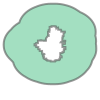

In [7]:
generate_buffer(proj_gdf.geometry.iloc[0], 25, crs = proj_gdf.crs)

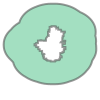

In [7]:
generate_buffer(proj_gdf.geometry.iloc[1], 25, crs = proj_gdf.crs)

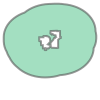

In [8]:
generate_buffer(proj_gdf.geometry.iloc[2], 25, crs = proj_gdf.crs)

In [8]:
proj_gdf['buffer_zone'] = proj_gdf.geometry.apply(generate_buffer, radius_mi=20, crs = proj_gdf.crs)
proj_gdf

,Project ID,geometry,area,buffer_zone
0,IA1701-A61,"MULTIPOLYGON (((-96.38180 42.90340, -96.38260 ...",0.079482,"POLYGON ((-96.95195 43.01447, -96.93730 43.032..."


In [9]:
def inner_holes(shape, crs):
    if type(shape) == shapely.geometry.multipolygon.MultiPolygon:
        proj_polys = gpd.GeoSeries([pol for pol in shape.geoms], crs = crs)
    elif type(shape) == shapely.geometry.Polygon:
        proj_polys = gpd.GeoSeries([shape], crs = crs)
    else:
        raise ValueError("shape must be a Shapely Polygon or MultiPolygon")
    
    interior_rings = proj_polys.interiors.sum()  # a collection of linear rings as 'holes' in the data
    if len(interior_rings) != 0:
        fillings = [shapely.geometry.Polygon(ring) for ring in interior_rings] #if shapely.geometry.Polygon(ring).area < sizelim]
        fill_poly = gpd.GeoSeries(fillings, crs = crs)
        return fill_poly.unary_union
    else:
        return np.nan

In [10]:
proj_gdf['inner_holes'] = proj_gdf.geometry.apply(inner_holes, crs = proj_gdf.crs)
proj_gdf

,Project ID,geometry,area,buffer_zone,inner_holes
0,IA1701-A61,"MULTIPOLYGON (((-96.38180 42.90340, -96.38260 ...",0.079482,"POLYGON ((-96.95195 43.01447, -96.93730 43.032...","MULTIPOLYGON (((-96.57780 42.73600, -96.57800 ..."


## Filter Rurality

In [11]:
us_county_gdf = gpd.read_file("../data/cb_2018_us_county_20m/cb_2018_us_county_20m.shp")
us_county_gdf = us_county_gdf.to_crs(proj_gdf.crs)
us_county_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."
...,...,...,...,...,...,...,...,...,...,...
3215,38,005,01034216,0500000US38005,38005,Benson,06,3596569006,131708143,"POLYGON ((-99.84661 48.37130, -99.49292 48.370..."
3216,72,079,01804520,0500000US72079,72079,Lajas,13,155287827,106643202,"POLYGON ((-67.10904 18.05608, -67.06791 18.066..."
3217,31,159,00835901,0500000US31159,31159,Seward,06,1479995670,11542537,"POLYGON ((-97.36812 41.04695, -96.91094 41.046..."
3218,37,023,01008539,0500000US37023,37023,Burke,06,1311146878,20719896,"POLYGON ((-81.90665 35.88338, -81.94319 35.960..."


In [12]:
ruca_code = pd.read_excel("../data/ruca2010_revised/ruca2010revised.xlsx", sheet_name="Data", skiprows=1, 
                         dtype = 'str', converters = {"Tract Population, 2010": int, "Land Area (square miles), 2010": float, "Population Density (per square mile), 2010": float})
ruca_code

/tmp/ipykernel_2228761/1644811767.py:1: ParserWarning: Both a converter and dtype were specified for column Tract Population, 2010 - only the converter will be used.
  ruca_code = pd.read_excel("../data/ruca2010_revised/ruca2010revised.xlsx", sheet_name="Data", skiprows=1,
/tmp/ipykernel_2228761/1644811767.py:1: ParserWarning: Both a converter and dtype were specified for column Land Area (square miles), 2010 - only the converter will be used.
  ruca_code = pd.read_excel("../data/ruca2010_revised/ruca2010revised.xlsx", sheet_name="Data", skiprows=1,
/tmp/ipykernel_2228761/1644811767.py:1: ParserWarning: Both a converter and dtype were specified for column Population Density (per square mile), 2010 - only the converter will be used.
  ruca_code = pd.read_excel("../data/ruca2010_revised/ruca2010revised.xlsx", sheet_name="Data", skiprows=1,


,State-County FIPS Code,Select State,Select County,State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/),Primary RUCA Code 2010,"Secondary RUCA Code, 2010 (see errata)","Tract Population, 2010","Land Area (square miles), 2010","Population Density (per square mile), 2010"
0,01001,AL,Autauga County,01001020100,1,1,1912,3.787641,504.799727
1,01001,AL,Autauga County,01001020200,1,1,2170,1.289776,1682.46237
2,01001,AL,Autauga County,01001020300,1,1,3373,2.065366,1633.124331
3,01001,AL,Autauga County,01001020400,1,1,4386,2.464376,1779.760676
4,01001,AL,Autauga County,01001020500,1,1,10766,4.400686,2446.436531
...,...,...,...,...,...,...,...,...,...
73997,72153,PR,Yauco Municipio,72153750501,1,1,4960,0.693337,7153.810353
73998,72153,PR,Yauco Municipio,72153750502,1,1,2092,0.263530,7938.381391
73999,72153,PR,Yauco Municipio,72153750503,1,1,2357,1.280621,1840.512771
74000,72153,PR,Yauco Municipio,72153750601,1,1,5315,4.251936,1250.018953


In [13]:
import urllib
import os
import tqdm

def filter_rural(shape, ruca_threshold = 4, shape_name = "default"):
    buffer_counties = us_county_gdf[us_county_gdf.geometry.intersects(shape)]
    tract_gdf = gpd.GeoDataFrame()
    
    # read tract shapefile in counties that intersects with the buffer, if not present, download shapefile
    print("reading tracts shape file")
    full_fips_list = buffer_counties.STATEFP.str.cat(buffer_counties.COUNTYFP)
    for fips in tqdm.tqdm(full_fips_list):
        file_name = "tl_2020_{}_tract20.zip".format(fips)
        file_path = "../data/tiger2020_tracts/" + file_name
        if not os.path.exists(file_path):
            url = "https://www2.census.gov/geo/tiger/TIGER2020PL/LAYER/TRACT/2020/" + file_name
            urllib.request.urlretrieve(url, file_path)
        county_tract_gdf = gpd.read_file(file_path)
        tract_gdf = pd.concat([tract_gdf, county_tract_gdf])
    tract_gdf = tract_gdf.to_crs(proj_gdf.crs)
    
    tract_gdf = tract_gdf.merge(ruca_code.loc[:, ['State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)', 'Primary RUCA Code 2010']], 
                                left_on = "GEOID20", right_on = "State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)")
    tract_gdf['PRIMARY_RUCA'] = pd.to_numeric(tract_gdf['Primary RUCA Code 2010'])
    tract_gdf.drop(columns=['Primary RUCA Code 2010', 'State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)'], inplace = True)

    rural_tracts = tract_gdf[(tract_gdf.PRIMARY_RUCA >= ruca_threshold) & (tract_gdf.PRIMARY_RUCA != 99)]
    
    str_list_county_fips = '\n'.join(fip for fip in full_fips_list)
    with open("../data/tiger2020_tracts/{}.txt".format(shape_name), "w") as f:
        f.write(str_list_county_fips)
    
    return shapely.intersection(rural_tracts.geometry.unary_union, shape)

In [14]:
proj_gdf['rural_buffer_zone'] = proj_gdf.apply(lambda row: filter_rural(row['buffer_zone'], ruca_threshold = 7, shape_name = row['Project ID']), axis = 1)

reading tracts shape file


100%|██████████| 9/9 [00:00<00:00, 17.48it/s]


In [15]:
proj_gdf

,Project ID,geometry,area,buffer_zone,inner_holes,rural_buffer_zone
0,IA1701-A61,"MULTIPOLYGON (((-96.38180 42.90340, -96.38260 ...",0.079482,"POLYGON ((-96.95195 43.01447, -96.93730 43.032...","MULTIPOLYGON (((-96.57780 42.73600, -96.57800 ...","MULTIPOLYGON (((-96.80651 42.73554, -96.80651 ..."


In [40]:
# THis section is not required to run the rest of this notebook.
# It's added here later to aid the selection of Ookla data

proj_area = proj_gdf['geometry'][0]
buffer = proj_gdf['rural_buffer_zone'][0]
holes = proj_gdf['inner_holes'][0]

proj_area = gpd.GeoSeries([poly for poly in proj_area.geoms]).unary_union
buffer = gpd.GeoSeries([poly for poly in buffer.geoms]).unary_union
holes = gpd.GeoSeries([poly for poly in holes.geoms]).unary_union
buffer_of_buffer = gpd.GeoSeries([gpd.GeoSeries([proj_area, buffer, holes]).unary_union], crs = proj_gdf.crs).to_crs(
    "EPSG:3857").buffer(5 * 1609.34).to_crs("EPSG: 4326")
buffer_of_buffer.to_file("../data/iaproject/project_5mi_to_buffer.shp")

In [57]:
# proj_gdf.to_csv("../data/reconnect_subscribers/reconnect_project_buffers.csv", sep="|")

In [67]:
# proj_gdf.loc[:, ["Project ID", "inner_holes"]].set_geometry("inner_holes").to_file("../data/iaproject/project_holes.shp")

/tmp/ipykernel_3138598/3593381979.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  proj_gdf.loc[:, ["Project ID", "inner_holes"]].set_geometry("inner_holes").to_file("../data/iaproject/project_holes.shp")


In [16]:
proj_gdf.to_crs("EPSG:3857").area / (1000 ** 2)

0    1343.791879
dtype: float64

In [18]:
proj_gdf.to_crs("EPSG:3857").set_geometry("rural_buffer_zone").to_crs("EPSG:3857").area / (1000 ** 2)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [22]:
rural_bk_gdf = gpd.sjoin(bk_gdf, proj_gdf.set_geometry(col='rural_buffer_zone'), how = 'inner', predicate = 'intersects')
rural_bk_gdf = gpd.GeoDataFrame(rural_bk_gdf, geometry = 'geometry_left')
rural_bk_gdf.shape

/tmp/ipykernel_2228761/2518943204.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  rural_bk_gdf = gpd.sjoin(bk_gdf, proj_gdf.set_geometry(col='rural_buffer_zone'), how = 'inner', predicate = 'intersects')


(12240, 259)

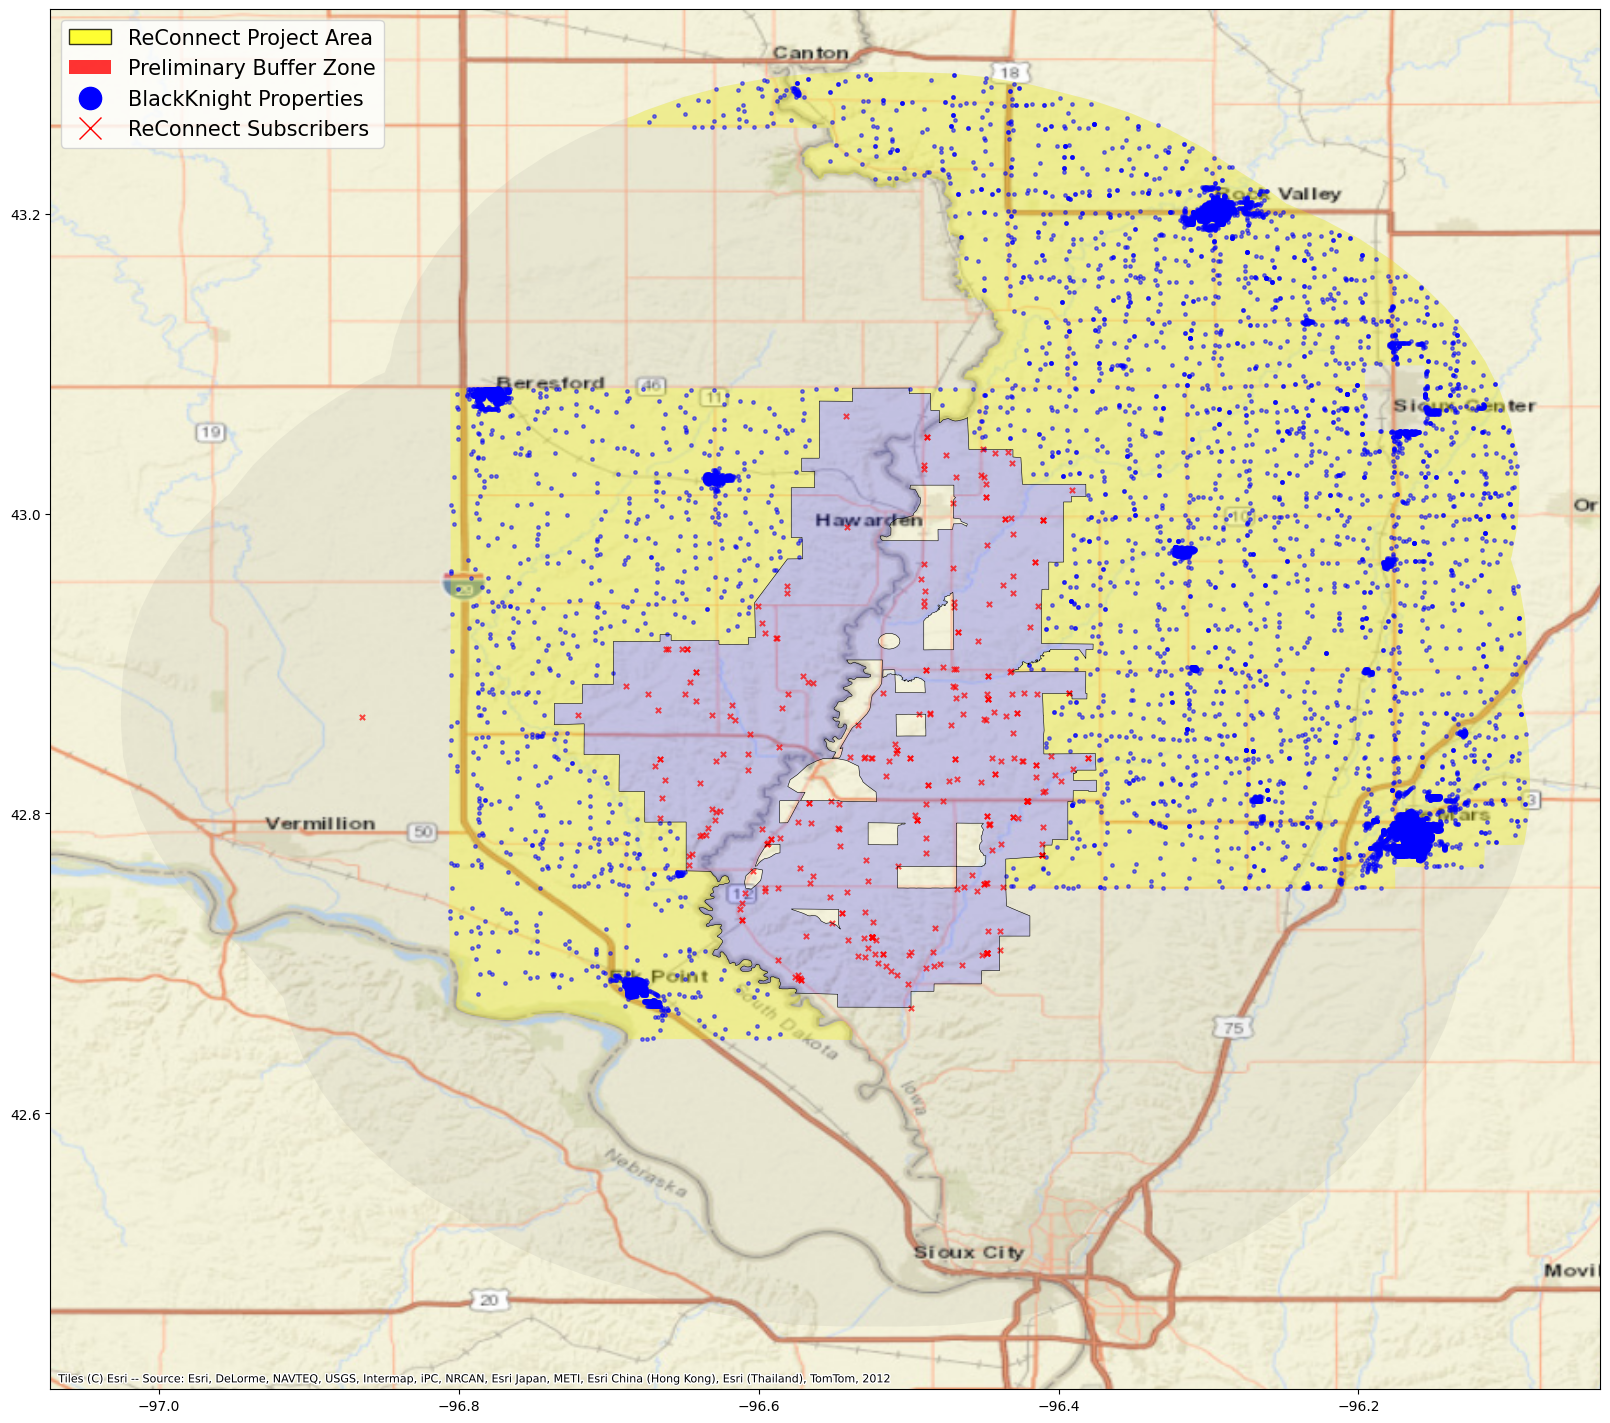

In [27]:
ax = proj_gdf.buffer_zone.plot(color = "grey", alpha=0.1, figsize = (20,20))
proj_gdf.rural_buffer_zone.plot(ax = ax, color = 'yellow', alpha = 0.3)
proj_gdf.geometry.plot(ax = ax, color = 'blue', alpha = 0.2)
proj_gdf.geometry.boundary.plot(ax = ax, color = 'black', linewidth=0.4)

rural_bk_gdf.plot(ax = ax, color = 'blue', markersize = 6, alpha = 0.5)
proj_subscr_gdf.plot(ax = ax, color = 'red', marker="x", markersize = 14, alpha = 0.7)

patch_list =[patches.Patch(facecolor = 'yellow', alpha=.8, linewidth = 1, edgecolor='black', label = "ReConnect Project Area"),
            patches.Patch(facecolor = 'red', alpha=.8, linewidth = 0, edgecolor = 'white', label = "Preliminary Buffer Zone"),
            lines.Line2D([0], [0], color = "blue", marker='o', markersize=16, lw=0, label="BlackKnight Properties"),
            lines.Line2D([0], [0], color = "red", marker='x', markersize=16, lw=0, label="ReConnect Subscribers"),]


ax.legend(handles=patch_list, fontsize=15, loc='upper left',
        bbox_to_anchor = (0,1), title_fontsize=15)

cx.add_basemap(ax, crs=proj_gdf.crs.to_string(), source = cx.providers.Esri.WorldStreetMap)

In [21]:
# rural_bk_gdf.to_csv("../data/bk_in_rural_buffer.csv")

In [18]:
max_rows = pd.get_option("display.max_rows")
pd.set_option("display.max_rows", 100)
print(proj_subscr_gdf.loc[:, ['year_built']].groupby(proj_subscr_gdf['Project ID']).value_counts() /
      proj_subscr_gdf.groupby(proj_subscr_gdf['Project ID']).size() * 100)
pd.set_option("display.max_rows", max_rows)

Project ID  year_built
IA1701-A61  1920.0        19.155844
            1900.0         4.545455
            1998.0         4.220779
            1910.0         3.246753
            2000.0         3.246753
                            ...    
MO1701-A60  1860.0         0.354610
            1852.0         0.354610
            1984.0         0.354610
            1985.0         0.354610
            1987.0         0.354610
Length: 155, dtype: float64


In [18]:
max_rows = pd.get_option("display.max_rows")
pd.set_option("display.max_rows", 100)
print(proj_subscr_gdf.loc[:, ['total_numberof_rooms', 'numberof_bedrooms', 'numberof_baths']].groupby(proj_subscr_gdf['Project ID']).value_counts() /
      proj_subscr_gdf.groupby(proj_subscr_gdf['Project ID']).size() * 100)
pd.set_option("display.max_rows", max_rows)

Project ID  total_numberof_rooms  numberof_bedrooms  numberof_baths
IA1701-A61  0.0                   0.0                0.0                19.805195
            6.0                   3.0                100.0               6.493506
            8.0                   4.0                200.0               4.220779
            5.0                   3.0                100.0               4.220779
            7.0                   3.0                200.0               3.571429
                                                     100.0               3.246753
            6.0                   2.0                200.0               2.922078
            8.0                   4.0                100.0               2.922078
            6.0                   3.0                200.0               2.922078
            7.0                   4.0                200.0               2.597403
            5.0                   3.0                200.0               2.597403
            7.0               

In [19]:
proj_subscr_gdf.county_land_use_description.value_counts()

SINGLE FAMILY RESIDENTIAL ASSUMED              161
1 STORY FRAME                                  142
SINGLE-FAMILY / OWNER OCCUPIED-RURAL           129
SINGLE-FAMILY / OWNER OCCUPIED                 110
RESIDENTIAL STRUCTURES                         107
SINGLE FAMILY RESIDENTIAL (ASSUMED)             55
MFD HOME (DOUBLE)                               45
IMPROVED LAND - OWNER OCCUPIED                  39
1 1/2 STORY FRAME                               17
1 STORY BRICK                                   17
2 STORY FRAME                                   15
1 STORY BERMED                                   9
RES IMPROVEMENTS ON AG LAND - OWNER CCUPIED      9
AG DWELLING                                      7
AGRICULTURE                                      6
COMMERCIAL                                       5
AG LAND W/BLDS                                   5
MFD HOME (SINGLE)                                5
RES IMPROVEMENTS ON AGRICULTURAL LAND            5
1 STORY LOG-PINE               

In [42]:
temp = rural_bk_gdf.loc[:, ['numberof_bedrooms', 'numberof_baths']].groupby(rural_bk_gdf['Project ID']).value_counts() / rural_bk_gdf.groupby(rural_bk_gdf['Project ID']).size() * 100
temp.groupby(level=0).head(5)

Project ID  numberof_bedrooms  numberof_baths
IA1701-A61  0                  0                 24.930521
                               100               13.184568
                               200                9.571685
            3                  100                6.596371
                               200                6.555501
MO1701-A60  0                  100               35.511126
                               0                 15.869165
            3                  100               15.492722
            2                  100               12.188389
            3                  200                8.030785
ND1702-A59  0                  0                 97.302269
                               100                1.502146
                               200                0.275904
            3                  200                0.245248
            4                  200                0.214592
dtype: float64

In [44]:
bk_mo_problem = rural_bk_gdf[(rural_bk_gdf["numberof_baths"] == 100) & (rural_bk_gdf["numberof_bedrooms"] == 0) & (rural_bk_gdf["Project ID"] == "MO1701-A60")]
bk_mo_problem.loc[:, ['total_numberof_rooms', 'numberof_bedrooms', 'numberof_baths', 'full_address']]

,total_numberof_rooms,numberof_bedrooms,numberof_baths,full_address
dpid,,,,
290610001996,0,0,100,"18238 332ND ST, JAMESPORT, MO, 64648"
290610002042,0,0,100,"20340 STATE HIGHWAY 190, JAMESPORT, MO, 64648"
290610002053,0,0,100,"609 N STATE HIGHWAY 190, JAMESPORT, MO, 64648"
290610002054,0,0,100,"206 E IVO ST, JAMESPORT, MO, 64648"
290610002055,0,0,100,"20590 STATE HIGHWAY 190, JAMESPORT, MO, 64648"
...,...,...,...,...
291150010896,0,0,100,"14277 HIGHWAY B, LINNEUS, MO, 64653"
291150010897,0,0,100,"19669 CLARK DR, LINNEUS, MO, 64653"
291150010907,0,0,100,"12035 HIGHWAY E, HUMPHREYS, MO, 64646"


In [56]:
bk_mo_problem.loc[:, ['total_numberof_rooms', 'numberof_bedrooms', 'numberof_baths', 'full_address']].to_csv("address_0b1b_bufferzone_mo.csv")

In [55]:
bk_mo_problem.fips_code.value_counts() / rural_bk_gdf.fips_code.value_counts() * 100

19119          NaN
19149          NaN
19167          NaN
27069          NaN
27089          NaN
27119          NaN
29061    80.721118
29079    58.427762
29081    77.655678
29115    12.195122
29117     7.239057
29129    13.471503
29211     1.052632
38035          NaN
38039          NaN
38063          NaN
38067          NaN
38091          NaN
38097          NaN
38099          NaN
46083          NaN
46127          NaN
Name: fips_code, dtype: float64

In [48]:
sub_mo_problem = subscr_gdf[(subscr_gdf["numberof_baths"] == 100) & (subscr_gdf["numberof_bedrooms"] == 0) & (subscr_gdf["Project ID"] == "MO1701-A60")]
sub_mo_problem.loc[:, ['total_numberof_rooms', 'numberof_bedrooms', 'numberof_baths', 'full_address']]

,total_numberof_rooms,numberof_bedrooms,numberof_baths,full_address
310,0.0,0.0,100.0,"496 SW HIGHWAY W, TRENTON, MO, 64683"
311,0.0,0.0,100.0,"496 SW HIGHWAY W, TRENTON, MO, 64683"
312,0.0,0.0,100.0,"286 SW HIGHWAY W, TRENTON, MO, 64683"
313,0.0,0.0,100.0,"286 SW HIGHWAY W, TRENTON, MO, 64683"
319,0.0,0.0,100.0,"6398 LIV 502, TRENTON, MO, 64683"
...,...,...,...,...
580,0.0,0.0,100.0,"368 NE 8TH AVE, TRENTON, MO, 64683"
582,0.0,0.0,100.0,"267 NE 37TH ST, TRENTON, MO, 64683"
584,0.0,0.0,100.0,"378 NE 8TH AVE, TRENTON, MO, 64683"
585,0.0,0.0,100.0,"75 NW HIGHWAY A, TRENTON, MO, 64683"


In [53]:
sub_mo_problem.fips_code.value_counts() / subscr_gdf.fips_code.value_counts() * 100

19149.0         NaN
19167.0         NaN
29079.0    74.00722
29117.0    40.00000
38035.0         NaN
38091.0         NaN
38099.0         NaN
46127.0         NaN
Name: fips_code, dtype: float64

In [46]:
for i in bk_gdf.columns:
    print(i, end=' | ')

fips_code | pid | apn | duplicateapn | property_address_source_flag | property_full_street_address | property_city_name | property_state | property_zip_code | property_zip4 | property_unit_type | property_unit_number | property_house_number | property_street_direction_left | property_street_name | property_street_suffix | property_street_direction_right | property_address_carrier_route | property_address_latitiude | property_address_longitude | property_address_census_tract | assessee_owner_name | _2nd_assessee_owner_name | assessee_owner_vesting_code | tax_account_number | mail_careof_name | assessee_mail_full_street_address | assessee_mail_city_name | assessee_mail_state_code | assessee_mail_zip_code | assessee_mail_zip4 | assessee_mail_unit_type | assessee_mail_unit_number | owner_occupied | assessed_land_value | assessed_improvement_value | total_assessed_value | assessment_year | california_homeowner_exemption | tax_exemption_codes | tax_rate_code_area | recorder_document_number_f

In [43]:
proj_subscr_gdf.fips_code

0      19149.0
1      19149.0
2      19149.0
3      19149.0
4      19149.0
        ...   
913    38099.0
914    38099.0
915    38099.0
916    38099.0
917    38099.0
Name: fips_code, Length: 918, dtype: float64

In [22]:
sum(rural_bk_gdf["year_built"].isna())

4918

In [23]:
rural_bk_gdf.shape

(27450, 256)

In [35]:
# proj_subscr_gdf.full_address.to_csv("project_subscriber_full_address.csv", index=True)
proj_subscr_gdf.loc[:, ["full_address", "numberof_bedrooms", "numberof_baths", "building_area"]].to_csv("project_subscriber_full_address.csv", index=True)

In [37]:
# rural_bk_gdf.full_address.to_csv("project_bufferzone_full_address.csv", index=True)
rural_bk_gdf.loc[:, ["full_address", "numberof_bedrooms", "numberof_baths", "building_area"]].to_csv("project_bufferzone_full_address.csv", index=True)

In [26]:
rural_bk_gdf[~rural_bk_gdf["year_built"].isna()].property_state.value_counts()

MO    11094
IA     8613
SD     2657
MN      168
Name: property_state, dtype: int64

In [33]:
rural_bk_gdf['building_area'].value_counts()

0        5032
1344      205
960       188
1008      182
1040      173
         ... 
9114        1
10080       1
25050       1
43200       1
2150        1
Name: building_area, Length: 3284, dtype: int64